# 3강. 다중 Qubit 게이트

이번 강의에서는 **다중 Qubit 게이트**에 대해 배워보겠습니다!  
다중 Qubit 게이트는 여러 큐빗을 연결하여 복잡한 양자 연산을 수행하는 데 사용됩니다.

대표적인 다중 Qubit 게이트로는 **CNOT (Controlled-NOT) 게이트**가 있습니다.  
이 게이트를 사용하여 큐빗 사이의 관계를 조작하는 방법을 알아봅시다.

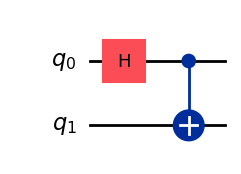

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

# 2-큐빗 양자 회로 생성
qc = QuantumCircuit(2)

# 첫 번째 큐빗에 Hadamard 게이트 적용 (중첩 상태 생성)
qc.h(0)

# CNOT 게이트 적용 (제어 큐빗: 0, 대상 큐빗: 1)
qc.cx(0, 1)

# 회로 시각화
qc.draw(output='mpl')

## CNOT 게이트란?

CNOT 게이트는 "제어 큐빗"과 "대상 큐빗" 사이의 관계를 조작합니다.  
**제어 큐빗이 |1⟩일 때 대상 큐빗을 반전**시키는 역할을 합니다.

예를 들어, 다음과 같은 상태에서:
- 제어 큐빗 = |0⟩ → 대상 큐빗은 변하지 않음.
- 제어 큐빗 = |1⟩ → 대상 큐빗이 |0⟩에서 |1⟩로, 또는 |1⟩에서 |0⟩로 바뀜.

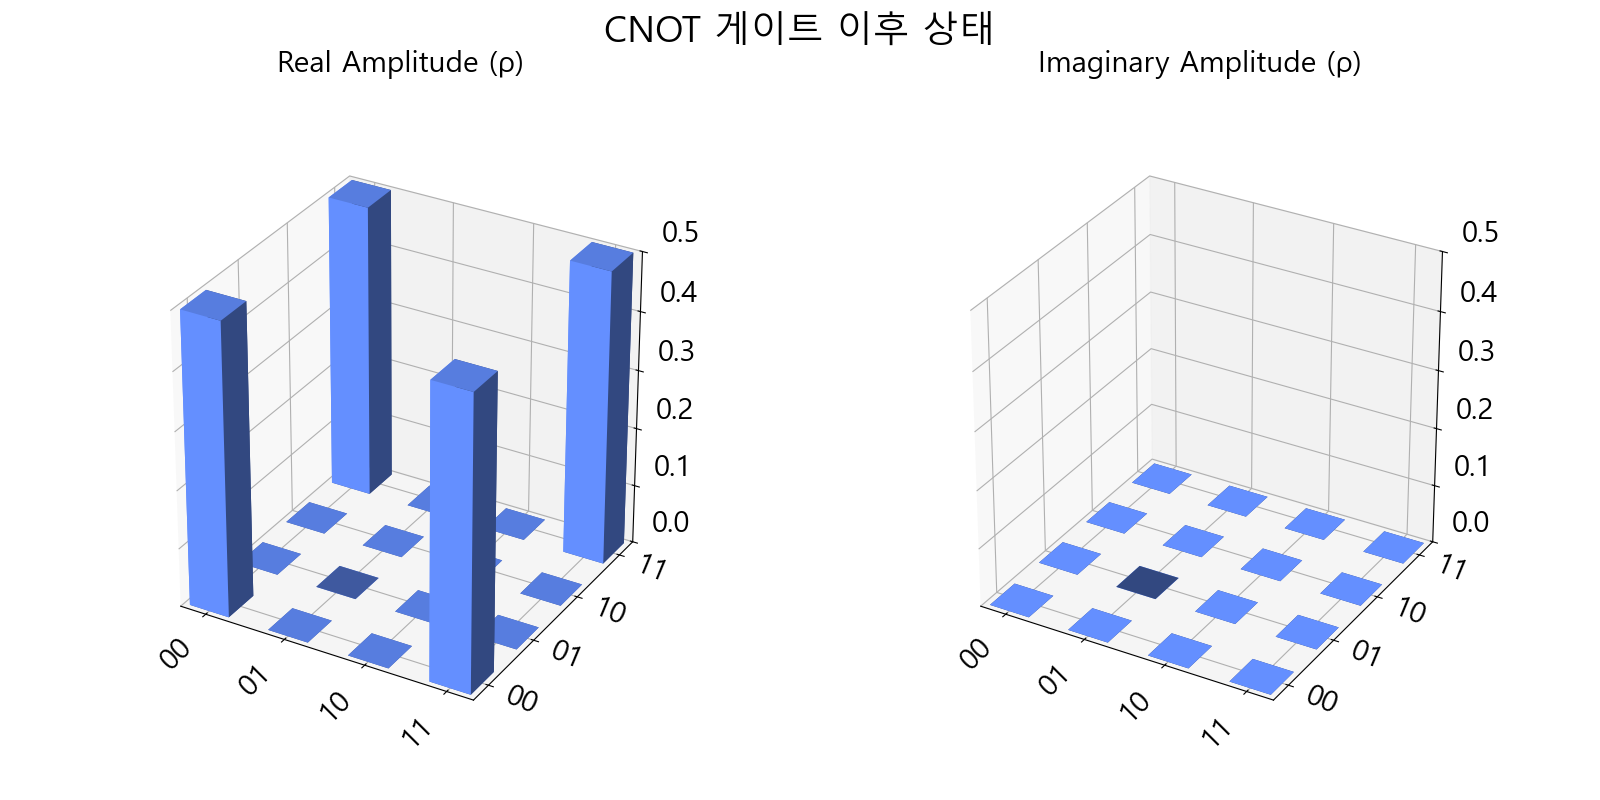

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import Image, display

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 상태 벡터 추출
state = Statevector.from_instruction(qc)

# 상태 시각화 및 저장
fig = plot_state_city(state, title="CNOT 게이트 이후 상태")
fig.savefig("images/3강. statevector_output.png")
display(Image("images/3강. statevector_output.png"))

### 두 큐빗이 얽힘 상태로 되는 과정

---

#### 1. **처음 상태**
- 두 큐빗은 초기 상태에서 다음과 같습니다:
  - 첫 번째 큐빗: **|0⟩**
  - 두 번째 큐빗: **|0⟩**
- 초기 상태는 두 큐빗 모두 0 상태인 **|00⟩**<wbr>입니다.

---

#### 2. **Hadamard 게이트 적용 (첫 번째 큐빗)**
- 첫 번째 큐빗에 **Hadamard 게이트**<wbr>를 적용합니다:
  $$
  H|0⟩ = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩)
  $$
- 두 번째 큐빗은 여전히 **|0⟩** 상태입니다.
- 따라서 두 큐빗의 상태는 다음과 같습니다:
  $$
  \frac{1}{\sqrt{2}} (|00⟩ + |10⟩)
  $$

**이 상태의 의미**:
- 첫 번째 큐빗은 **0일 수도 있고, 1일 수도 있는 상태**<wbr>입니다.
- 두 번째 큐빗은 항상 **0** 상태입니다.

---

#### 3. **CNOT 게이트 적용**
- **CNOT 게이트**를 적용합니다:
  - **제어 큐빗**: 첫 번째 큐빗
  - **대상 큐빗**: 두 번째 큐빗
  - 동작:
    - 첫 번째 큐빗이 **|0⟩**<wbr>이면, 두 번째 큐빗은 변하지 않음.
    - 첫 번째 큐빗이 **|1⟩**<wbr>이면, 두 번째 큐빗이 **|0⟩ → |1⟩**<wbr>로 반전.

- 위 상태에 CNOT을 적용하면 다음과 같은 상태가 됩니다:
  $$
  \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
  $$

---

#### 4. **결과의 의미**
- 두 큐빗이 **얽힘 상태**로 연결되었습니다:
  - 첫 번째 큐빗이 **0**으로 측정되면, 두 번째 큐빗도 반드시 **0**입니다.
  - 첫 번째 큐빗이 **1**으로 측정되면, 두 번째 큐빗도 반드시 **1**입니다.
- 두 큐빗은 서로 독립적으로 존재하지 않고, 하나의 상태가 결정되면 다른 큐빗의 상태도 자동으로 결정됩니다.

---

#### 5. **얽힘 상태란?**
- 얽힘 상태는 두 큐빗이 강하게 연결되어 있는 상태를 뜻합니다.
- 이 상태에서는 두 큐빗의 상태가 동시에 결정되며, 이를 **양자 얽힘(Quantum Entanglement)**<wbr>이라고 부릅니다.

---

#### 요약
1. **Hadamard 게이트**:
   - 첫 번째 큐빗을 **중첩 상태**로 만듭니다.
2. **CNOT 게이트**:
   - 두 큐빗을 얽힘 상태로 만듭니다.
3. **결과 상태**:
    
   $$
   \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
   $$
   - 두 큐빗은 각각 **50% 확률**로 **|00⟩** 또는 **|11⟩** 상태에 존재합니다.


### CNOT 게이트 이후 상태 결과

- 실행한 코드에서 시각화된 결과는 **CNOT 게이트가 적용된 상태 벡터**를 나타내요.  
- 이 상태는 두 큐빗이 얽힌 상태로, 양자 상태를 다음과 같이 표현할 수 있어요:

$$
\frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
$$


---

#### 1. 실수(real amplitude) 부분:
- **|00⟩**<wbr>와 **|11⟩** 상태의 값이 각각 **0.5**로 표시돼요.
  - 이는 두 큐빗이 **|00⟩ 또는 |11⟩ 상태**에 있을 확률이 각각 **50%**<wbr>라는 것을 의미해요.
- 나머지 상태 (|01⟩, |10⟩ 등)는 값이 0으로 표시돼요. 이는 이 상태들이 발생하지 않는다는 것을 의미해요.

---

#### 2. 허수(imaginary amplitude) 부분:
- **모든 값이 0**으로 표시돼요.
  - 이는 현재 양자 회로에서 허수 성분이 포함되지 않은 상태 벡터를 가지고 있음을 의미해요.
  - 회로에 허수 값을 생성하는 연산(예: 위상 게이트)이 없기 때문에 허수 성분이 나타나지 않아요.

---

#### 3. 결과 해석:
- 이 시각화는 두 큐빗이 얽힌 상태에서 **측정 가능한 확률 진폭**을 도시 형태로 보여줘요.
- **얽힘 상태**는 두 큐빗이 독립적으로 존재하지 않고 서로 연결되어 있다는 것을 나타내요.
  - 예를 들어, 첫 번째 큐빗이 **|0⟩**<wbr>로 측정되면 두 번째 큐빗도 반드시 **|0⟩**<wbr>로 측정돼요.
  - 마찬가지로, 첫 번째 큐빗이 **|1⟩**<wbr>로 측정되면 두 번째 큐빗도 반드시 **|1⟩**<wbr>로 측정돼요.
  
---

이 시각화는 양자 얽힘(Entanglement)의 핵심을 보여주며, **CNOT 게이트**가 큐빗 간의 상호 작용을 어떻게 만들어내는지 이해하는 데 도움을 줘요.

## CNOT 게이트의 역할 이해하기

CNOT 게이트는 큐빗 간의 얽힘(Entanglement)을 만들어내요.  
위 상태 시각화를 통해 큐빗이 얽힌 상태가 되었음을 확인할 수 있어요.

### 정리

- **CNOT 게이트**는 다중 Qubit 게이트의 대표적인 예에요.  
- 이 게이트를 통해 큐빗 간의 관계를 조작하고 얽힌 상태를 만들 수 있어요.

다음 강의에서는 **양자 측정(Measurement)**<wbr>에 대해 배워볼 거예요!  
그럼 4강에서 만나요! 😊